JavaScript Object Notation

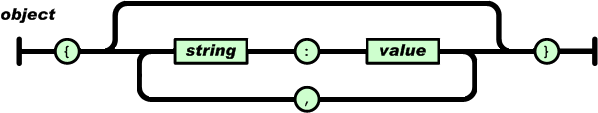

In [58]:
from IPython.core.display import Image 
Image('object.png')

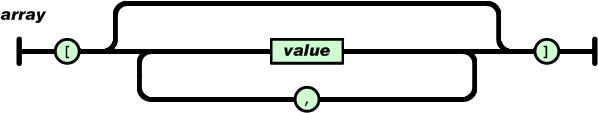

In [59]:
Image('array.png')

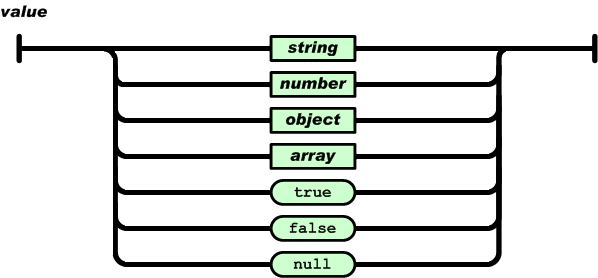

In [60]:
Image('value.png')

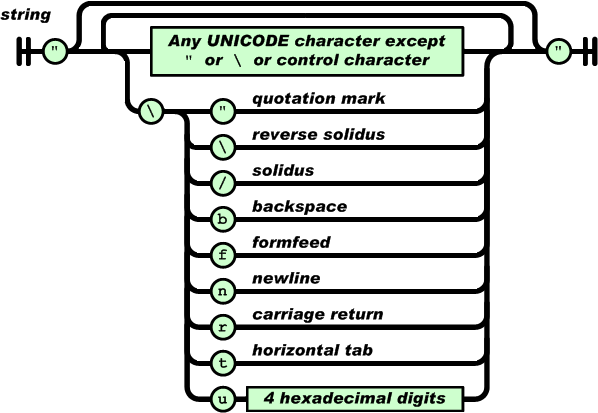

In [61]:
Image('string.png')

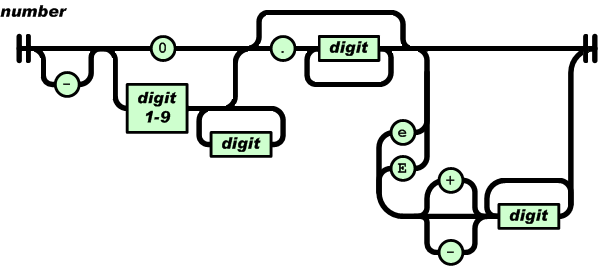

In [62]:
Image('number.png')

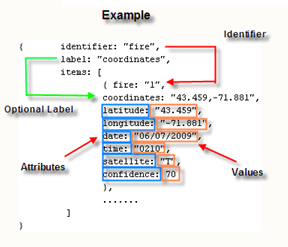

In [63]:
Image('https://s3.amazonaws.com/GSTArticles/Dojo/dojo4_1.png')

In [1]:
import json

In [2]:
data = [ { 'a':'A', 'b':(2, 4), 'c':3.0 } ]

In [3]:
print data

[{'a': 'A', 'c': 3.0, 'b': (2, 4)}]


In [4]:
repr(data)

"[{'a': 'A', 'c': 3.0, 'b': (2, 4)}]"

JSON dumps() - serializes object to a JSON formatted string

In [5]:
data_string = json.dumps(data)

In [6]:
print "JSON: " + data_string

JSON: [{"a": "A", "c": 3.0, "b": [2, 4]}]


JSON sort keys

In [11]:
print(json.dumps({"c": 0, "b": 0, "a": 0}, sort_keys=True))

{"a": 0, "b": 0, "c": 0}


JSON indent - use for highly-nested structures

In [9]:
print(json.dumps({'6': 7, '4': 5}, sort_keys=True, indent=4))

{
    "4": 5, 
    "6": 7
}


In [22]:
data = [ { 'a':'A', 'b':(2, 4), 'c':3.0 } ]
print 'INDENT:', json.dumps(data, sort_keys=True, indent=2)

INDENT: [
  {
    "a": "A", 
    "b": [
      2, 
      4
    ], 
    "c": 3.0
  }
]


In [12]:
json.dumps([1,2,3,{'4': 5, '6': 7}], separators=(',', ':'))

'[1,2,3,{"4":5,"6":7}]'

JSON - encode and decode (string are converted to unicode, tuples - to lists)

In [15]:
data = [ { 'a':'A', 'b':(2, 4), 'c':3.0 } ]
# returns a JSON representation of a Python data structure
data_string = json.dumps(data)

In [16]:
print 'ENCODED:', data_string

ENCODED: [{"a": "A", "c": 3.0, "b": [2, 4]}]


In [17]:
# deserializes data_string to a Python object 
decoded = json.loads(data_string)
print 'DECODED:', decoded

DECODED: [{u'a': u'A', u'c': 3.0, u'b': [2, 4]}]


In [20]:
print 'ORIGINAL:', data[0]['b'], type(data[0]['b'])
print 'DECODED :', decoded[0]['b'], type(decoded[0]['b'])

ORIGINAL: (2, 4) <type 'tuple'>
DECODED : [2, 4] <type 'list'>


each of these operations increase the number of bytes needed to transmit the same amount of data, so be careful in production

In [23]:
data = [ { 'a':'A', 'b':(2, 4), 'c':3.0 } ]
print 'DATA:', repr(data)
print 'repr(data)             :', len(repr(data))
print 'dumps(data)            :', len(json.dumps(data))
print 'dumps(data, indent=2)  :', len(json.dumps(data, indent=2))
print 'dumps(data, separators):', len(json.dumps(data, separators=(',',':')))

DATA: [{'a': 'A', 'c': 3.0, 'b': (2, 4)}]
repr(data)             : 35
dumps(data)            : 35
dumps(data, indent=2)  : 76
dumps(data, separators): 29


JSON - encoding dictionaries (dictionary keys are expected to be strings)

In [24]:
data = [ { 'a':'A', 'b':(2, 4), 'c':3.0, ('d',):'D tuple' } ]

In [25]:
print 'First attempt'
try:
    print json.dumps(data)
except (TypeError, ValueError) as err:
    print 'ERROR:', err

print
print 'Second attempt'
print json.dumps(data, skipkeys=True)

First attempt
ERROR: keys must be a string

Second attempt
[{"a": "A", "c": 3.0, "b": [2, 4]}]


JSON - working with custom object types

In [45]:
class MyObj(object):
    def __init__(self, s):
        self.s = s
    def __repr__(self):
        return '<MyObj(%s)>' % self.s

Encode MyObj

In [46]:
obj = MyObj('instance value goes here')

print 'First attempt'
try:
    print json.dumps(obj)
except TypeError, err:
    print 'ERROR:', err

def convert_to_builtin_type(obj):
    print 'default(', repr(obj), ')'
    # Convert objects to a dictionary of their representation
    d = { '__class__':obj.__class__.__name__, 
          '__module__':obj.__module__,
          }
    d.update(obj.__dict__)
    return d

print
print 'With default'
encoded_object = json.dumps(obj, default=convert_to_builtin_type)
print encoded_object

First attempt
ERROR: <MyObj(instance value goes here)> is not JSON serializable

With default
default( <MyObj(instance value goes here)> )
{"s": "instance value goes here", "__module__": "__main__", "__class__": "MyObj"}


Decode MyObj

In [47]:
import json

def dict_to_object(d):
    if '__class__' in d:
        class_name = d.pop('__class__')
        module_name = d.pop('__module__')
        module = __import__(module_name)
        print 'MODULE:', module
        class_ = getattr(module, class_name)
        print 'CLASS:', class_
        # as json converts strings to unicode, we need to convert to ascii before using them as keys
        args = dict( (key.encode('ascii'), value) for key, value in d.items())
        print 'INSTANCE ARGS:', args
        inst = class_(**args)
    else:
        inst = d
    return inst

myobj_instance = json.loads(encoded_object, object_hook=dict_to_object)
print myobj_instance

MODULE: <module '__main__' (built-in)>
CLASS: <class '__main__.MyObj'>
INSTANCE ARGS: {'s': u'instance value goes here'}
<MyObj(instance value goes here)>


JSON Encoder Class

In [48]:
encoder = json.JSONEncoder()
data = [ { 'a':'A', 'b':(2, 4), 'c':3.0 } ]

# output is generated in logical units
for part in encoder.iterencode(data):
    print 'PART:', part

PART: [
PART: {
PART: "a"
PART: : 
PART: "A"
PART: , 
PART: "c"
PART: : 
PART: 3.0
PART: , 
PART: "b"
PART: : 
PART: [2
PART: , 4
PART: ]
PART: }
PART: ]


Encode Custom Objects

In [49]:
import json

class MyEncoder(json.JSONEncoder):
    
    def default(self, obj):
        print 'default(', repr(obj), ')'
        # Convert objects to a dictionary of their representation
        d = { '__class__':obj.__class__.__name__, 
              '__module__':obj.__module__,
              }
        d.update(obj.__dict__)
        return d

obj = MyObj('internal data')
print obj
# encode custom class MyObj
print MyEncoder().encode(obj)

<MyObj(internal data)>
default( <MyObj(internal data)> )
{"s": "internal data", "__module__": "__main__", "__class__": "MyObj"}


Decode Text, and covert the dictionary to objects

In [50]:
class MyDecoder(json.JSONDecoder):
    
    def __init__(self):
        json.JSONDecoder.__init__(self, object_hook=self.dict_to_object)

    def dict_to_object(self, d):
        if '__class__' in d:
            class_name = d.pop('__class__')
            module_name = d.pop('__module__')
            module = __import__(module_name)
            print 'MODULE:', module
            class_ = getattr(module, class_name)
            print 'CLASS:', class_
            args = dict( (key.encode('ascii'), value) for key, value in d.items())
            print 'INSTANCE ARGS:', args
            inst = class_(**args)
        else:
            inst = d
        return inst
print encoded_object
myobj_instance = MyDecoder().decode(encoded_object)
print myobj_instance

{"s": "instance value goes here", "__module__": "__main__", "__class__": "MyObj"}
MODULE: <module '__main__' (built-in)>
CLASS: <class '__main__.MyObj'>
INSTANCE ARGS: {'s': u'instance value goes here'}
<MyObj(instance value goes here)>


Working with Streams and Files

Write encoding directly into a file for large data structures

In [52]:
data = [ { 'a':'A', 'b':(2, 4), 'c':3.0 } ]

f = open('test.file', mode='w+')
json.dump(data, f)
f.flush()

print open(f.name, 'r').read()

[{"a": "A", "c": 3.0, "b": [2, 4]}]


In [55]:
# set reference point at the beginning of the file
f.seek(0)
# load file as json
print json.load(f)

[{u'a': u'A', u'c': 3.0, u'b': [2, 4]}]


Mixed Data Streams

In [56]:
decoder = json.JSONDecoder()

def get_decoded_and_remainder(input_data):
    obj, end = decoder.raw_decode(input_data)
    remaining = input_data[end:]
    return (obj, end, remaining)

encoded_object = '[{"a": "A", "c": 3.0, "b": [2, 4]}]'
extra_text = 'This text is not JSON.'

print 'JSON first:'
obj, end, remaining = get_decoded_and_remainder(' '.join([encoded_object, extra_text]))
print 'Object              :', obj
print 'End of parsed input :', end
print 'Remaining text      :', repr(remaining)

print
print 'JSON embedded:'
try:
    obj, end, remaining = get_decoded_and_remainder(
        ' '.join([extra_text, encoded_object, extra_text])
        )
except ValueError, err:
    print 'ERROR:', err

JSON first:
Object              : [{u'a': u'A', u'c': 3.0, u'b': [2, 4]}]
End of parsed input : 35
Remaining text      : ' This text is not JSON.'

JSON embedded:
ERROR: No JSON object could be decoded
